In [6]:
using Plots
using DifferentialEquations

In [8]:
function SIR!(du, u, p, t)
   
    # --> Unpack variables.
    s, i, r = u
    
    # --> Unpack parameters.
    β, γ = p
    
    # --> Equations.
    du[1] = -β * s * i
    du[2] = β * s * i - γ * i
    du[3] = γ * i
    
    return
end

SIR! (generic function with 1 method)

In [10]:
function simulate(ϵ, vax, β, γ, tspan)
    
    # --> Initial condition.
    u0 = [1 - ϵ - vax , ϵ , 0]
    
    # --> Parameters.
    p = β, γ
    
    # --> ODE Problem.
    prob = ODEProblem(SIR!, u0, tspan, p)
    
    # --> Solution.
    sol = solve(prob)
    
    return sol
end

simulate(ϵ, β, γ, tspan) = simulate(ϵ, 0, β, γ, tspan)

simulate (generic function with 2 methods)

In [13]:
ϵ = 0.001 / 100
R₀, τ = 3, 0.5
β, γ = R₀/τ, 1/τ
tspan = (0.0, 12.0)

sol = simulate(ϵ, β, γ, tspan);

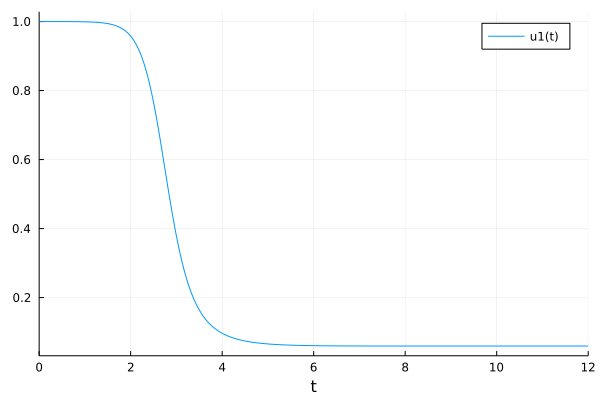

In [15]:
plot(sol, vars=(0, 1))